<a href="https://colab.research.google.com/github/terentyevaolga/my_finances_project/blob/main/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

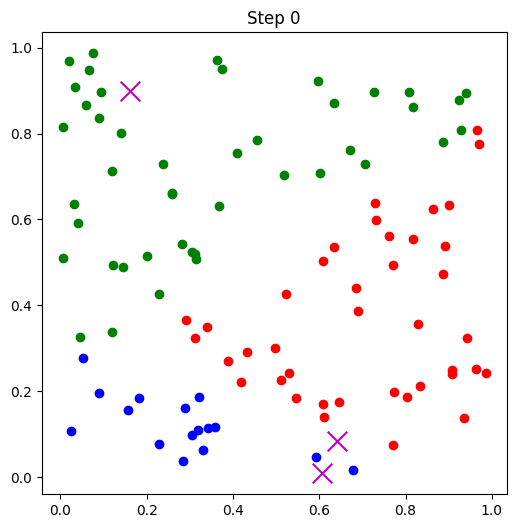

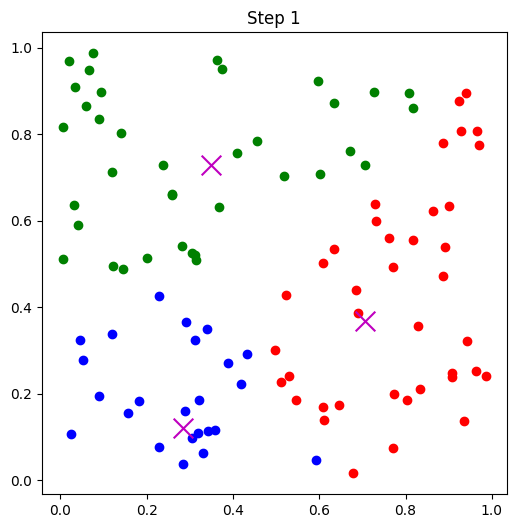

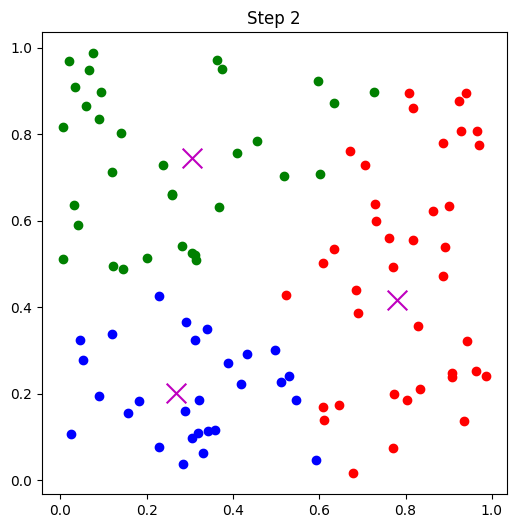

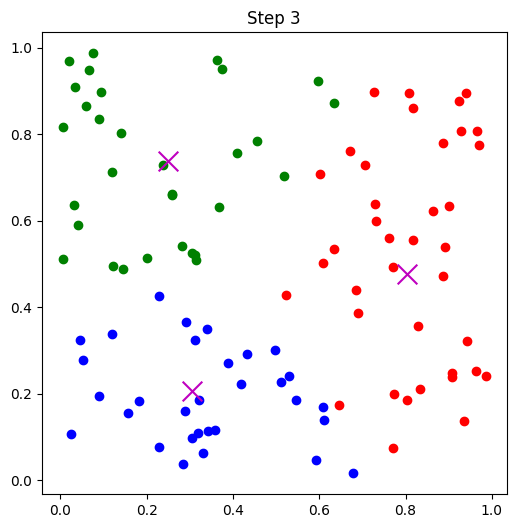

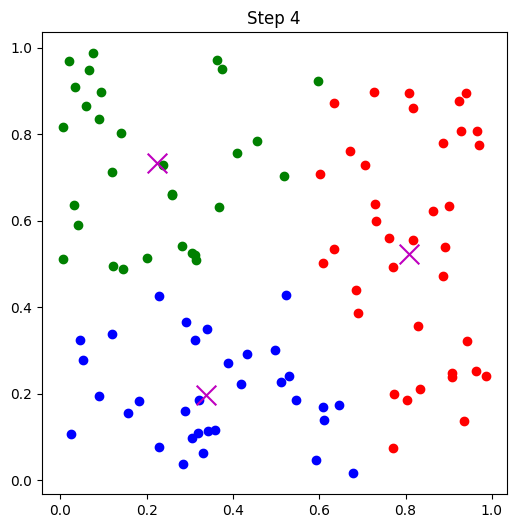

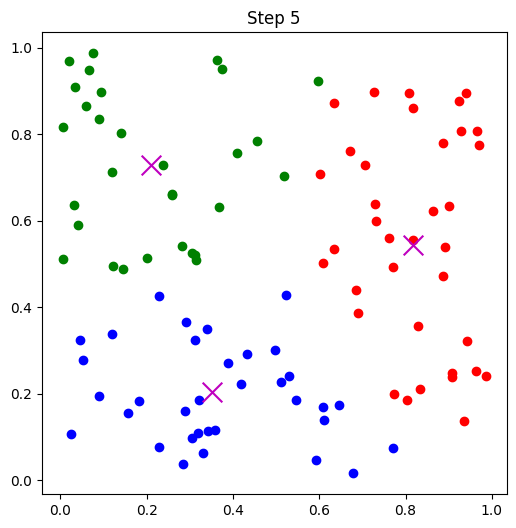

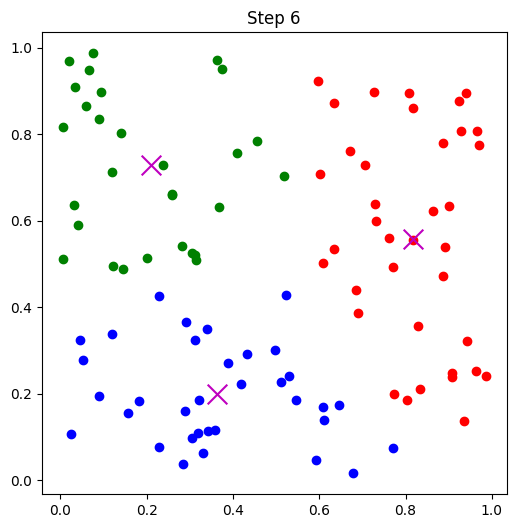

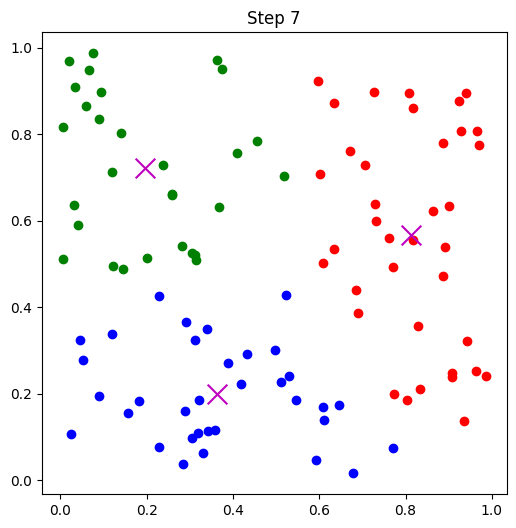

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
points = np.random.rand(100, 2)

k = 3
centroids = np.random.rand(k, 2)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

def distance(p1, p2):
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def assign_points(points, centroids):
    assignments = []
    for point in points:
        distances = [distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        assignments.append(cluster)
    return assignments


def compute_centroids(points, assignments, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [points[j] for j in range(len(points)) if assignments[j] == i]
        if len(cluster_points) > 0:
            new_centroid = np.mean(cluster_points, axis=0)
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(np.random.rand(2))
    return new_centroids


def plot_clusters(points, centroids, assignments, step):
    plt.figure(figsize=(6,6))
    for i in range(k):
        cluster_points = [points[j] for j in range(len(points)) if assignments[j] == i]
        plt.scatter([p[0] for p in cluster_points], [p[1] for p in cluster_points], color=colors[i])
        plt.scatter(centroids[i][0], centroids[i][1], marker='x', s=200, color='m')
    plt.title(f'Step {step}')
    plt.show()

max_iterations = 10

for i in range(max_iterations):
    assignments = assign_points(points, centroids)
    plot_clusters(points, centroids, assignments, i)
    new_centroids = compute_centroids(points, assignments, k)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids